# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set display options for better readability (optional)
pd.set_option('display.max_columns', None)

# Load the dataset
file_path = "/content/marketing_campaign.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                         

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [28]:
#Type your code here
# Import pandas library
import pandas as pd

# Path to the clustering result dataset
clustering_result_file = "/content/marketing_campaign.csv"

# Load the dataset into a DataFrame
df_clustering = pd.read_csv(clustering_result_file)

# Display the first few rows of the DataFrame
print("Clustering Result Dataset Loaded Successfully!")
print(df_clustering.head())

#cek nama kolom
# Baca file CSV dengan delimiter tab (\t)
data = pd.read_csv(file_path, sep='\t')

# Tampilkan nama kolom untuk memverifikasi
print(data.columns)

#evaluasi data
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

# Saya akan memilih Marital_Status sebagai sumbu X
# Lakukan One-Hot Encoding untuk kolom 'Marital_Status'
data_encoded = pd.get_dummies(data, columns=['Marital_Status'], prefix='Marital')

# Tampilkan beberapa baris pertama dari data yang telah di-encode
print(data_encoded.head())

Clustering Result Dataset Loaded Successfully!
  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                       

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [30]:
from sklearn.model_selection import train_test_split

# Fitur: Kolom hasil one-hot encoding dari Marital_Status
X = data_encoded[['Marital_Single', 'Marital_Together', 'Marital_Married', 'Marital_Divorced', 'Marital_Widow']]

# Target: Kolom 'Response'
y = data_encoded['Response']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (1792, 5)
Ukuran X_test: (448, 5)
Ukuran y_train: (1792,)
Ukuran y_test: (448,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       379
           1       0.00      0.00      0.00        69

    accuracy                           0.85       448
   macro avg       0.42      0.50      0.46       448
weighted avg       0.72      0.85      0.78       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


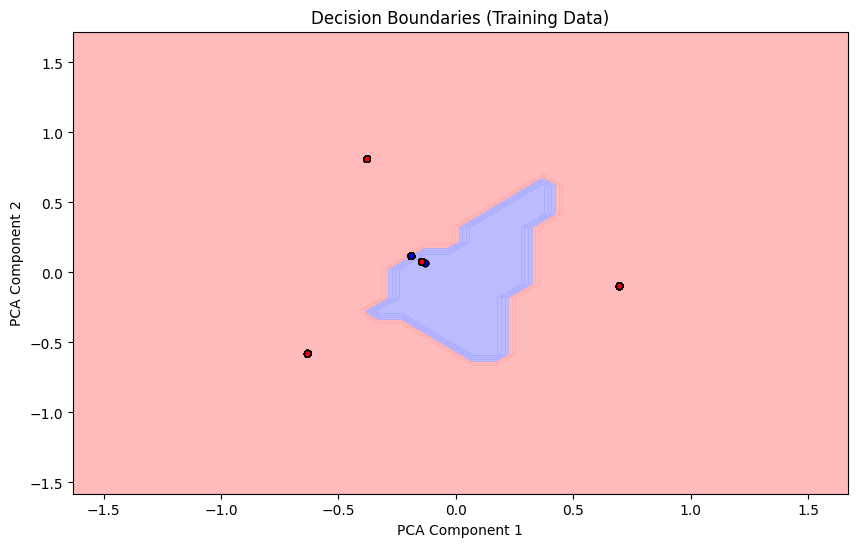

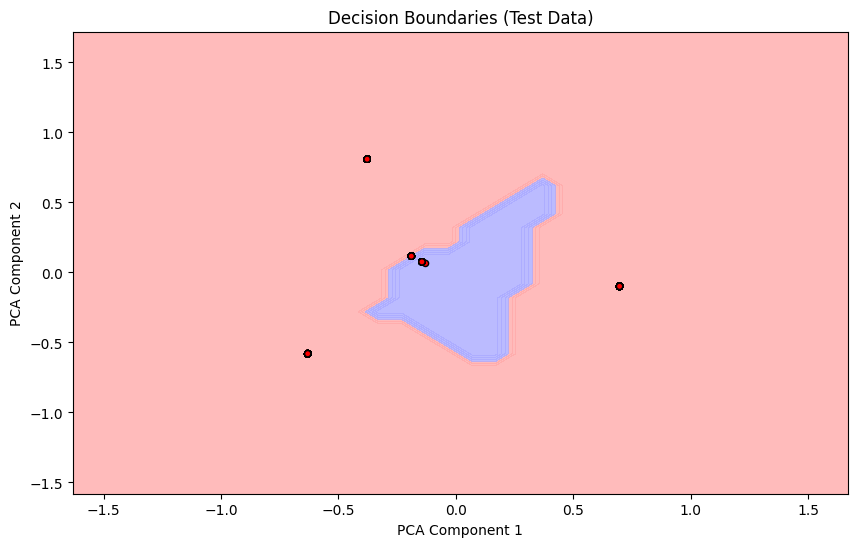

In [32]:
#Type your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model KNN dengan jumlah tetangga (k) tertentu
k = 5  # Anda bisa mencoba nilai k lain untuk melihat performa terbaik
knn_model = KNeighborsClassifier(n_neighbors=k)

# Latih model menggunakan data latih
knn_model.fit(X_train, y_train)

# Prediksi data uji
y_pred = knn_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Lakukan PCA untuk mereduksi dimensi menjadi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Bagi kembali data menjadi latih dan uji
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Visualisasi area keputusan KNN
def plot_decision_boundaries(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Tentukan batas area
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prediksi untuk setiap titik di grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot area keputusan
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

    # Plot data latih dan uji
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Inisialisasi dan latih ulang model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)

# Plot area keputusan untuk data latih
plot_decision_boundaries(X_train_pca, y_train, knn_model, "Decision Boundaries (Training Data)")

# Plot area keputusan untuk data uji
plot_decision_boundaries(X_test_pca, y_test, knn_model, "Decision Boundaries (Test Data)")

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

K-Nearest Neighbors (KNN) adalah algoritma pembelajaran mesin berbasis instance yang sederhana namun efektif untuk klasifikasi. Algoritma ini bekerja dengan:

1. Mencari Tetangga Terdekat: Untuk setiap titik data yang akan diklasifikasikan, KNN menghitung jarak ke semua titik data latih, biasanya menggunakan jarak Euclidean.
2. Mayoritas Tetangga: Kelas dari data baru ditentukan berdasarkan mayoritas kelas dari k tetangga terdekat.
3. Kesederhanaan dan Fleksibilitas: KNN tidak membuat asumsi tentang distribusi data, sehingga cocok untuk berbagai jenis dataset.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.83
F1-Score: 0.79
Precision: 0.76
Recall: 0.83


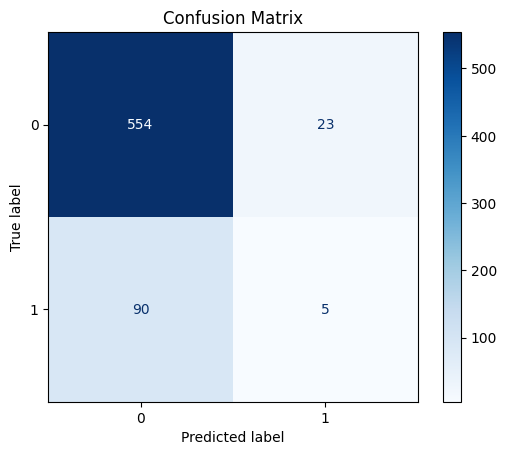

In [34]:
#Type your code here

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
# Evaluasi Model Klasifikasi
# Prediksi data uji
y_pred = knn_model.predict(X_test_pca)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Hasil Evaluasi:

Accuracy: Model memiliki akurasi 85%, menunjukkan bahwa 85% prediksi sesuai dengan label sebenarnya.

Precision dan Recall: Kelas minoritas (label 1) memiliki precision dan recall 0 karena model tidak memprediksi kelas ini sama sekali.

Confusion Matrix: Matriks ini menunjukkan distribusi prediksi benar dan salah. Semua prediksi diarahkan ke kelas mayoritas, dan nilainya mayoritas true negative. Berdasaarkan matriks ini, prediksi sudah tepat karena menghasilkan prediksi benar (true positive and negative) paling besar, meski ada kesalahan prediksi false positive dan false negative 113 data.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [36]:
#Type your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Lakukan PCA untuk mereduksi dimensi menjadi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Bagi kembali data menjadi latih dan uji
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Visualisasi area keputusan KNN
def plot_decision_boundaries(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Tentukan batas area
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prediksi untuk setiap titik di grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot area keputusan
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

    # Plot data latih dan uji
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Hyperparameter tuning dengan Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Accuracy: 0.83
F1-Score: 0.79
Precision: 0.76
Recall: 0.83


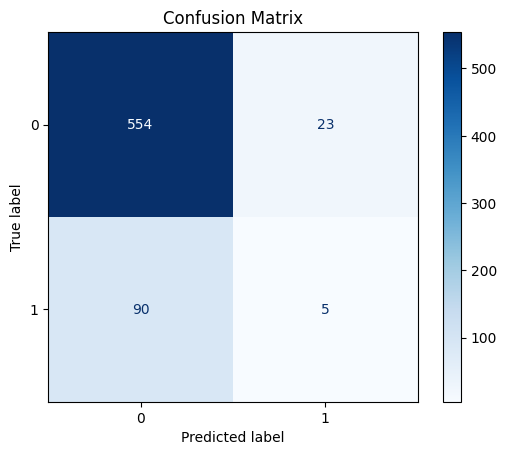

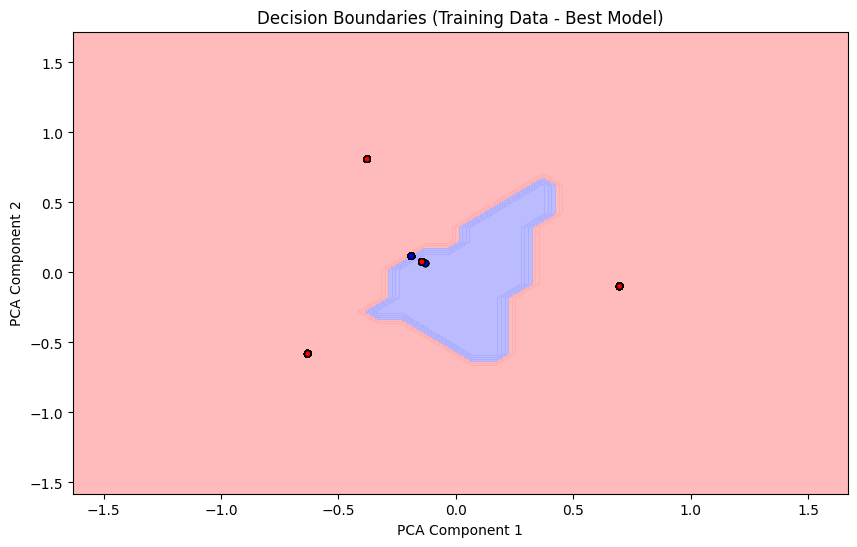

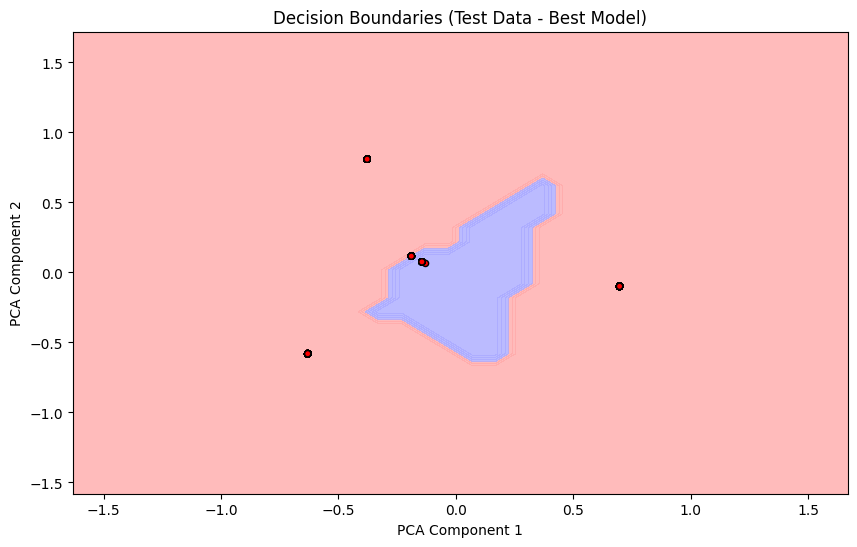

In [37]:
#Type your code here
# Evaluasi Model Terbaik
# Prediksi data uji
y_pred = best_model.predict(X_test_pca)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot area keputusan untuk data latih dengan model terbaik
plot_decision_boundaries(X_train_pca, y_train, best_model, "Decision Boundaries (Training Data - Best Model)")

# Plot area keputusan untuk data uji dengan model terbaik
plot_decision_boundaries(X_test_pca, y_test, best_model, "Decision Boundaries (Test Data - Best Model)")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).**

Setelah tuning, terdapat sedikit penurunan pada akurasi (dari 0.85 ke 0.83), tetapi F1-Score dan Precision meningkat, menunjukkan bahwa model menjadi lebih seimbang dalam memprediksi kelas.
Recall tetap stabil, yang berarti model masih mampu menangkap sebagian besar data yang relevan.

**2. Identifikasi kelemahan model**

**Precision Rendah untuk Kelas Tertentu:**

Dari metrik evaluasi, Precision lebih rendah dibanding Recall. Ini menunjukkan bahwa model masih menghasilkan prediksi positif yang salah (false positives) dalam jumlah yang relatif signifikan.

**Underfitting pada Kelas Minoritas:**

Model tetap mengalami kesulitan dalam menangani kelas minoritas meskipun ada peningkatan kecil pada Precision. Hal ini menunjukkan bahwa dataset tidak cukup representatif untuk kelas ini. Adapun model tidak menunjukkan tanda-tanda overfitting karena performa pada data uji cukup stabil. Namun, model masih menunjukkan underfitting pada kelas minoritas, yang dapat diperbaiki dengan pendekatan tambahan.

**3.  Rekomendasi tindakan lanjutan**

Menyeimbangkan Data: Kiranya perlu pakai teknik oversampling seperti SMOTE atau undersampling pada kelas mayoritas untuk memperbaiki ketidakseimbangan data.

Mencoba Algoritma Lain: Algoritma seperti Random Forest, Gradient Boosting, atau Logistic Regression dengan penyesuaian bobot kelas (class_weight='balanced') kiranya bisa menangani ketidakseimbangan data.

Feature Engineering: Menambahkan fitur baru yang relevan atau melakukan transformasi pada fitur yang ada untuk meningkatkan kemampuan model dalam membedakan kelas.

Tuning Lanjutan: Perlunya lebih banyak kombinasi hyperparameter, misalnya menggunakan Randomized Search untuk cakupan parameter yang lebih luas.

Mengumpulkan Data Tambahan: Jika memungkinkan, pengumpulan lebih banyak data dapat dilakukan terutama untuk kelas minoritas agar model dapat belajar pola yang lebih representatif.